In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"

In [2]:
X = 2*np.random.rand(100,1)
Y = 4 + 3*X + np.random.rand(100,1)

<function matplotlib.pyplot.show>

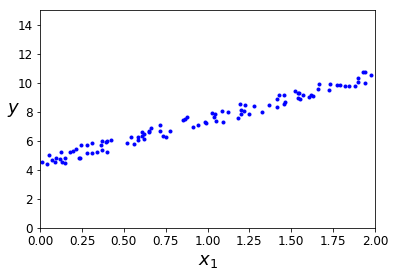

In [3]:
plt.plot(X,Y,"b.")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation = 0, fontsize = 18)
plt.axis([0,2,0,15])
plt.show

## Linear regression from scratch

In [4]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)

In [5]:
theta_best

array([[ 4.51359766],
       [ 2.98323418]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[  4.51359766],
       [ 10.48006601]])

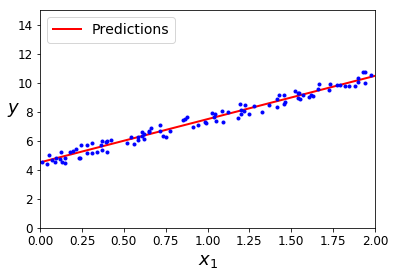

In [7]:
plt.plot(X_new, y_predict,"r-",linewidth = 2,label = "Predictions")
plt.plot(X, Y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

## Linear regression in scikit learn

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,Y)
lin_reg.predict(X_new)

array([[  4.51359766],
       [ 10.48006601]])

## Batch gradient descent from scratch

In [9]:
eta = 0.1 #learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)
for x in range(n_iterations):
    gradient = 2*X_b.T.dot(X_b.dot(theta)-Y)/m
    theta-=eta*gradient

In [10]:
theta

array([[ 4.51359766],
       [ 2.98323418]])

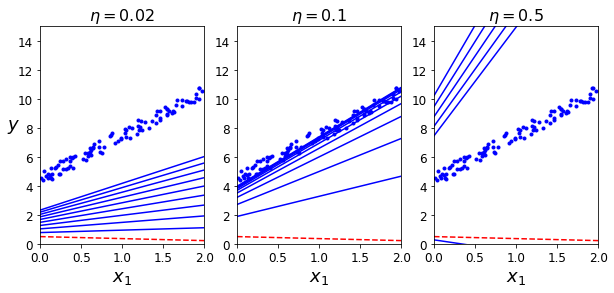

In [11]:
theta_path_bgd = []
def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, Y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - Y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

## Stochastic Gradient Descent

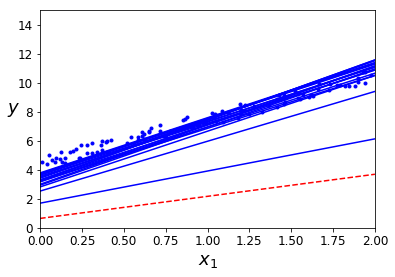

In [12]:
m = len(X_b)
n_epochs = 50
t0,t1 = 5,50
theta = np.random.randn(2,1)
def learning_schedule(t):
    return t0/(t+t1)
for epoch in range(n_epochs):
    for instance in range(m):
        if epoch == 0 and instance < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if instance > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)
        random_instance = np.random.randint(m)
        xi = X_b[random_instance:random_instance+1]
        yi = Y[random_instance:random_instance+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+instance)
        theta-= eta*gradients
plt.plot(X, Y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
plt.show() 

In [13]:
theta

array([[ 4.5151857 ],
       [ 2.97924466]])

## SGD using sklearn

In [14]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50,penalty=None,eta0=0.1)
sgd_reg.fit(X,Y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=50, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [15]:
sgd_reg.intercept_, sgd_reg.coef_

(array([ 4.51787487]), array([ 2.98972275]))

## Mini Batch Gradient descent from scratch

In [16]:
n_iterations = 50
minibatch_size = 20
theta = np.random.randn(2,1)

t0,t1 = 10,1000
def learning_schedule(t):
    return t0/(t+t1)
t=0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    Y_shuffled = Y[shuffled_indices]
    for i in range(0,m,minibatch_size):
        t+=1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = Y_shuffled[i:i+minibatch_size]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(t)
        theta-=eta*gradients

In [17]:
theta

array([[ 4.51673235],
       [ 2.97865635]])

# Polynomial Regression

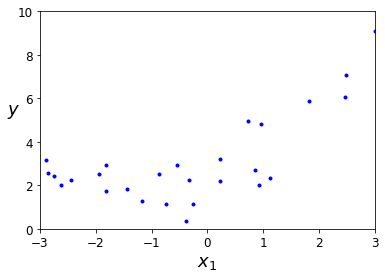

In [18]:
import numpy as np
m = 100
X = 6*np.random.randn(m,1)-3
y = 0.5 * X**2 + X +2 + np.random.randn(m,1)
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [19]:
# add higher powers
from sklearn .preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0],X_poly[0]

(array([-4.5610521]), array([ -4.5610521 ,  20.80319625]))

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([ 1.74467024]), array([[ 0.98501999,  0.50081386]]))

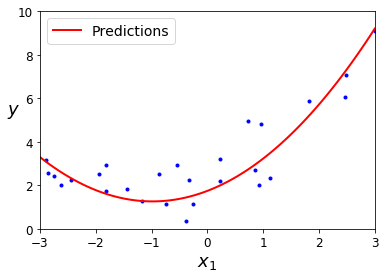

In [21]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

## Plotting learning curves

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
    X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2)
    train_errors, val_errors = [],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict,y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict,y_val))
    plt.plot(np.sqrt(train_errors),"r-+",linewidth = 2,label = 'train')
    plt.plot(np.sqrt(val_errors),"b-",linewidth = 2,label ="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14) 

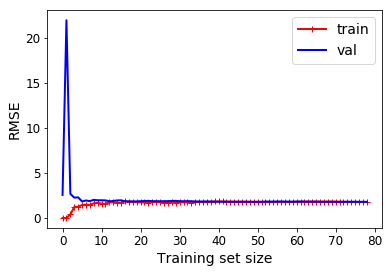

In [23]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,Y)
plt.show()

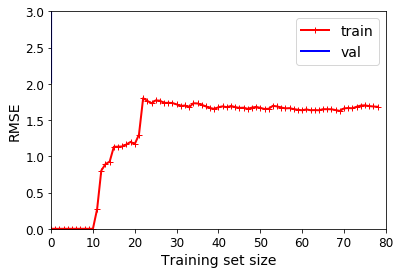

In [24]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ("poly_features",PolynomialFeatures(degree = 10,include_bias = False)),
    ("lin_reg",LinearRegression())
])
plot_learning_curves(polynomial_regression,X,Y)
plt.axis([0, 80, 0, 3])  
plt.show()

# Regularized models

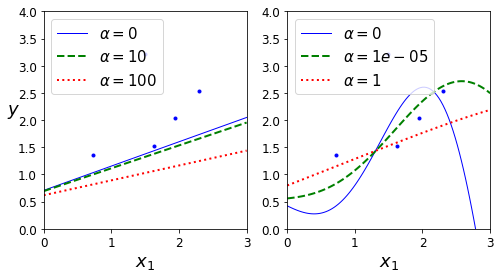

In [25]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
np.random.seed(42)
m = 20
X = 3*np.random.randn(m,1)
y = 1+0.5*X + np.random.randn(m,1)
X_new = np.linspace(0,3,100).reshape(100,1)
def plot_model(model_class,polynomial,alphas,**model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha,**model_kargs) if alpha>0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                ("poly_features",PolynomialFeatures(degree = 10,include_bias = False)),
                ("std_scaler",StandardScaler()),
                ("regul_reg",model),
            ])
        model.fit(X,y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new,y_new_regul,style,linewidth = lw,label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.show()
            

## Ridge regression

In [26]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1,solver="cholesky", random_state = 42)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[ 1.37187507]])

In [27]:
sgd_reg = SGDRegressor(penalty="l2", random_state = 42)
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([ 0.81845774])

### Lasso Regression 

In [28]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([ 1.35199604])

### Elastic Net

In [29]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5 , random_state = 42)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([ 1.35917735])

## Early stopping in polynomial stochastic gradient descent

In [30]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

from sklearn.base import clone

sgd_reg = SGDRegressor(n_iter = 1,penalty = None,learning_rate = "constant",eta0 = 0.0005,warm_start = True)

min_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled,y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict,y_val)
    if val_error < min_val_error:
        min_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)


In [31]:
best_epoch,best_model

(243, SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
        fit_intercept=True, l1_ratio=0.15, learning_rate=u'constant',
        loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
        random_state=None, shuffle=True, verbose=0, warm_start=True))

In [32]:
sgd_reg.intercept_

array([ 3.00994429])

## Logistic Regression

In [35]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [38]:
print (iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [41]:
X = iris["data"][:,3:]
y = (iris["target"]==2).astype(np.int)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

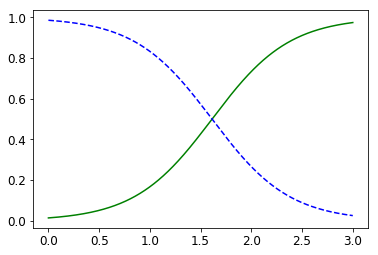

In [44]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.show()

In [46]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)
softmax_reg = LogisticRegression(multi_class = "multinomial",solver = 'lbfgs',C=10,random_state = 42)
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class=u'multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver=u'lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
softmax_reg.predict([[5,2]])

array([1])

In [49]:
softmax_reg.predict_proba([[5,2]])

array([[ 0.18103692,  0.81896308]])